Used  Libraries- sklearn library, Numpy, Panda and Scipy,Plot Lib- Seaborn and Matplot,statistics.

In [1]:
#1. Importing Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from statistics import mean

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report



In [2]:
#2. Load the data into the data frame.
df=pd.read_csv("Wine.csv")

# Analysis

In [3]:
#3.Check the types of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# 4. To display the 10 rows
# top 5 rows
df.head() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
# bottom 5 rows
df.tail() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [6]:
# 5.how many nulls in each column
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
# 6.Dropping the duplicate rows

In [8]:
# Total number of rows and columns
df.shape

(178, 14)

In [9]:
# Rows containing duplicate data
dupli_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", dupli_rows_df.shape)

number of duplicate rows:  (0, 14)


In [10]:
# Dropping the duplicates  ---if present
df = df.drop_duplicates()
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
# categorical data= qualitative -nominal-order does not matter
# 7 .category of Customer_Segment

df["Customer_Segment"].unique()

array([1, 2, 3], dtype=int64)

In [12]:
# total no.of values/rows for each category 
df["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [13]:
# 8. Description of each numeric column
# Observation:- Mean value is usually greater than Median value
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


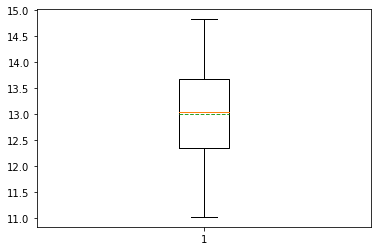

In [14]:
# 9. Detecting Outliers
# by default median is shown
# data spread,outliers,box is drawn on IQR i.e between Q1 and Q3
# red line -median and green line-mean
plt.boxplot(df["Alcohol"],showmeans=True,meanline=True)
plt.show()

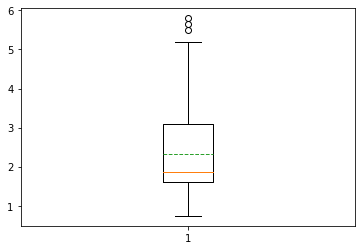

In [15]:
plt.boxplot(df["Malic_Acid"],showmeans=True,meanline=True)
plt.show()

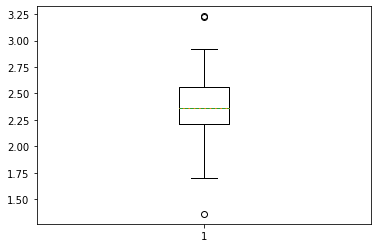

In [16]:
plt.boxplot(df["Ash"],showmeans=True,meanline=True)
plt.show()

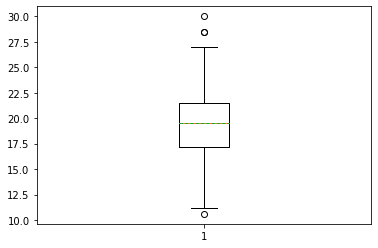

In [17]:
plt.boxplot(df["Ash_Alcanity"],showmeans=True,meanline=True)
plt.show()

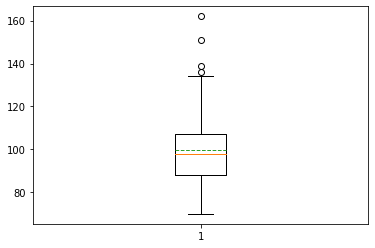

In [18]:
plt.boxplot(df["Magnesium"],showmeans=True,meanline=True)
plt.show()

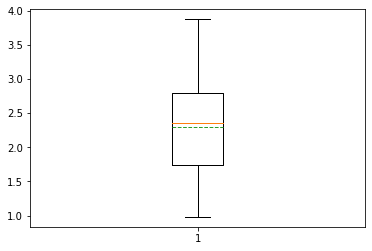

In [19]:
plt.boxplot(df["Total_Phenols"],showmeans=True,meanline=True)
plt.show()

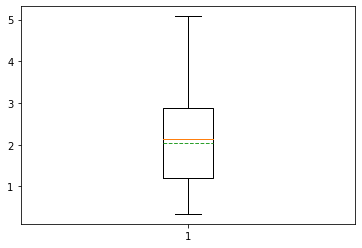

In [20]:
plt.boxplot(df["Flavanoids"],showmeans=True,meanline=True)
plt.show()

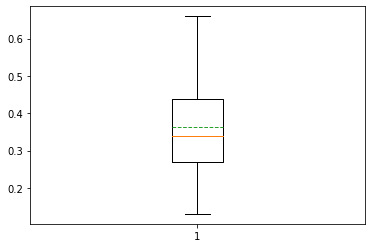

In [21]:
plt.boxplot(df["Nonflavanoid_Phenols"],showmeans=True,meanline=True)
plt.show()

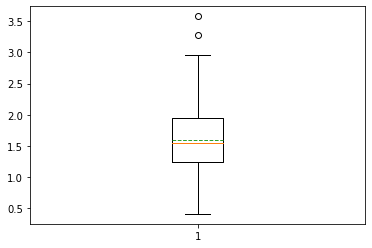

In [22]:
plt.boxplot(df["Proanthocyanins"],showmeans=True,meanline=True)
plt.show()

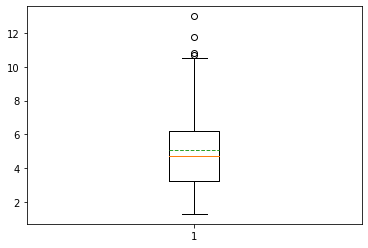

In [23]:
plt.boxplot(df["Color_Intensity"],showmeans=True,meanline=True)
plt.show()

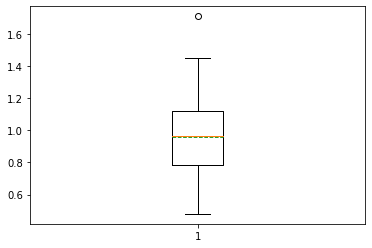

In [24]:
plt.boxplot(df["Hue"],showmeans=True,meanline=True)
plt.show()

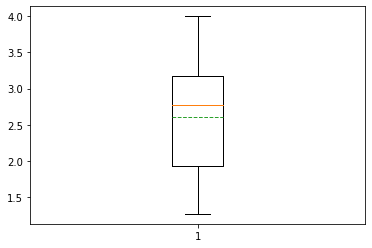

In [25]:
plt.boxplot(df["OD280"],showmeans=True,meanline=True)
plt.show()

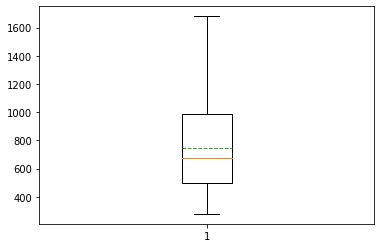

In [26]:
plt.boxplot(df["Proline"],showmeans=True,meanline=True)
plt.show()

In [27]:
# Observation:-Malic_Acid,Ash,Ash_Alcanity, Magnesium,Proanthocyanins,Color_Intensity, Hue have Outliers

In [28]:
# 10 .outlier detection and removal using  IQR score technique

In [29]:
# Quartile calculations:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("-----------:IQR score:---------\n",IQR)

-----------:IQR score:---------
 Alcohol                   1.3150
Malic_Acid                1.4800
Ash                       0.3475
Ash_Alcanity              4.3000
Magnesium                19.0000
Total_Phenols             1.0575
Flavanoids                1.6700
Nonflavanoid_Phenols      0.1675
Proanthocyanins           0.7000
Color_Intensity           2.9800
Hue                       0.3375
OD280                     1.2325
Proline                 484.5000
Customer_Segment          2.0000
dtype: float64


In [30]:
# We have IQR scores, now hold on outliers. 
#The below code will give an output with some true and false values. 
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

DataFrame.any(self, axis=0, bool_only=None, skipna=True, level=None, **kwargs)[source]
Return whether any element is True, potentially over an axis.
axis=1 means True

Returns False unless there at least one element within a series or along a Dataframe axis that is True or equivalent 
(e.g. non-zero or non-empty).
axis{0 or ‘index’, 1 or ‘columns’, None}, default 0
Indicate which axis or axes should be reduced.

0 / ‘index’ : reduce the index, return a Series whose index is the original column labels.

1 / ‘columns’ : reduce the columns, return a Series whose index is the original index.

None : reduce all axes, return a scalar.

In [31]:
# NaN value indicates False ----> means - no outliers
# non-NaN (numeric value) indicates True --> means outlier present
outliers=df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))]
outliers

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,5.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
outliers.sum()
# 7 columns have outliers

Alcohol                   0.00
Malic_Acid               16.96
Ash                       7.81
Ash_Alcanity             97.60
Magnesium               588.00
Total_Phenols             0.00
Flavanoids                0.00
Nonflavanoid_Phenols      0.00
Proanthocyanins           6.86
Color_Intensity          46.23
Hue                       1.71
OD280                     0.00
Proline                   0.00
Customer_Segment          0.00
dtype: float64

In [33]:
# No.of outliers in each column
outliers.count()


Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

#  outliers detected in columns:-  Malic_Acid,Ash ,Ash_Alcanity ,Magnesium, Proanthocyanins,Color_Intensity ,Hue                               

In [34]:
# total outliers
outliers.count().sum()

21

In [35]:
# Display only those rows , having axis=1 i.e True and outliers present

outliers=df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,1
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,2
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,2
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,2
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,2
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,2
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407,2
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,2
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,2


In [36]:
# ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR) is boolean mask-so we can use it to remove outliers
# masking the outliers by using '~' to exclude from original dataset
mask = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
mask

# out of 178 rows , 17 rows were outliers  and 161 rows have normal distribution

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [37]:
#total:normal distribution for each column
mask.count()

Alcohol                 161
Malic_Acid              161
Ash                     161
Ash_Alcanity            161
Magnesium               161
Total_Phenols           161
Flavanoids              161
Nonflavanoid_Phenols    161
Proanthocyanins         161
Color_Intensity         161
Hue                     161
OD280                   161
Proline                 161
Customer_Segment        161
dtype: int64

In [38]:
Q1 = df[["Malic_Acid","Ash","Ash_Alcanity", "Magnesium","Proanthocyanins","Color_Intensity", "Hue"]].quantile(0.25)
print("No.of Outliers in Columns (Q1)\n",Q1)
Q3 = df[["Malic_Acid","Ash","Ash_Alcanity", "Magnesium","Proanthocyanins","Color_Intensity", "Hue"]].quantile(0.75)
print("--------------------------------------------------------------------------------------------\n")
print("No.of Outliers in Columns (Q3)\n",Q3)
print("--------------------------------------------------------------------------------------------\n")
IQR=Q3-Q1
print("IQR in Columns \n",IQR)

No.of Outliers in Columns (Q1)
 Malic_Acid          1.6025
Ash                 2.2100
Ash_Alcanity       17.2000
Magnesium          88.0000
Proanthocyanins     1.2500
Color_Intensity     3.2200
Hue                 0.7825
Name: 0.25, dtype: float64
--------------------------------------------------------------------------------------------

No.of Outliers in Columns (Q3)
 Malic_Acid           3.0825
Ash                  2.5575
Ash_Alcanity        21.5000
Magnesium          107.0000
Proanthocyanins      1.9500
Color_Intensity      6.2000
Hue                  1.1200
Name: 0.75, dtype: float64
--------------------------------------------------------------------------------------------

IQR in Columns 
 Malic_Acid          1.4800
Ash                 0.3475
Ash_Alcanity        4.3000
Magnesium          19.0000
Proanthocyanins     0.7000
Color_Intensity     2.9800
Hue                 0.3375
dtype: float64


In [39]:
mask.shape

(161, 14)

# Here total 21 outliers were detected but after masking 17 were removed   using above technique 
there are 4 outliers unremoved

In [40]:
# 11. Histogram : to show the distribution of the variable values for each column

Text(0.5, 0, ' No.of Customer_Segment')

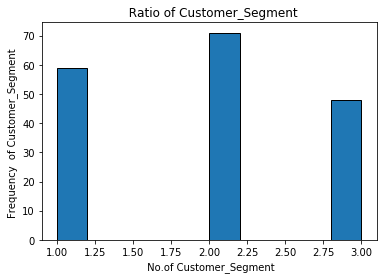

In [41]:
# For Customer_Segment:-
plt.hist(df["Customer_Segment"],edgecolor='k');
plt.title("  Ratio of Customer_Segment")
plt.ylabel("Frequency  of Customer_Segment ")
plt.xlabel(" No.of Customer_Segment")

Text(0.5, 0, 'Quantity of Alcohol')

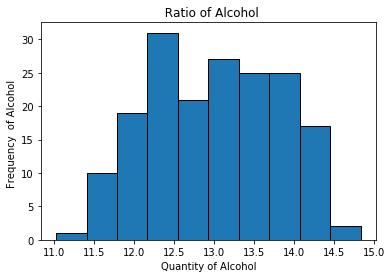

In [42]:
# For Alcohol:-
plt.hist(df["Alcohol"],edgecolor='k');
plt.title("  Ratio of Alcohol")
plt.ylabel("Frequency  of Alcohol ")
plt.xlabel("Quantity of Alcohol")

Text(0.5, 0, 'Quantity of Malic_Acid')

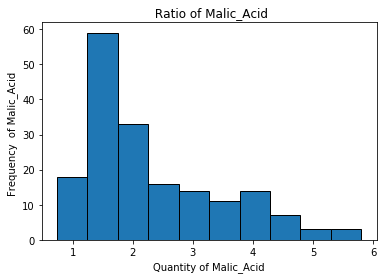

In [43]:
# For Malic_Acid :-
plt.hist(df["Malic_Acid"],edgecolor='k');
plt.title(" Ratio of Malic_Acid")
plt.ylabel("Frequency  of Malic_Acid ")
plt.xlabel("Quantity of Malic_Acid")

Text(0.5, 0, 'Quantity of Ash')

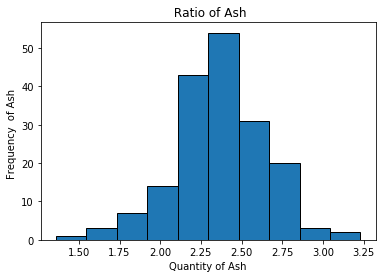

In [44]:
# For Ash :-
plt.hist(df["Ash"],edgecolor='k');
plt.title(" Ratio of Ash")
plt.ylabel("Frequency  of Ash ")
plt.xlabel("Quantity of Ash")

Text(0.5, 0, 'Quantity of Ash_Alcanity')

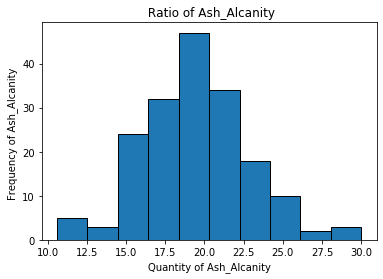

In [45]:
# For Ash_Alcanity :-
plt.hist(df["Ash_Alcanity"],edgecolor='k');
plt.title(" Ratio of Ash_Alcanity")
plt.ylabel("Frequency of Ash_Alcanity ")
plt.xlabel("Quantity of Ash_Alcanity")

Text(0.5, 0, 'Quantity of Magnesium')

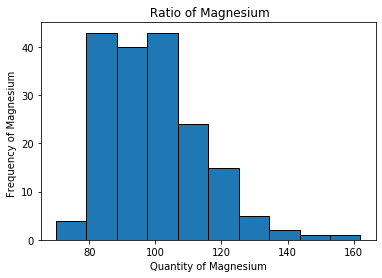

In [46]:
# For Magnesium :-
plt.hist(df["Magnesium"],edgecolor='k');
plt.title(" Ratio of Magnesium")
plt.ylabel("Frequency of Magnesium ")
plt.xlabel("Quantity of Magnesium")

Text(0.5, 0, 'Quantity of Total_Phenols')

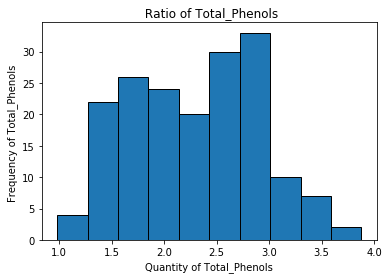

In [47]:
# For Total_Phenols :-
plt.hist(df["Total_Phenols"],edgecolor='k');
plt.title(" Ratio of Total_Phenols")
plt.ylabel("Frequency of Total_Phenols ")
plt.xlabel("Quantity of Total_Phenols")

Text(0.5, 0, 'Quantity of Flavanoids')

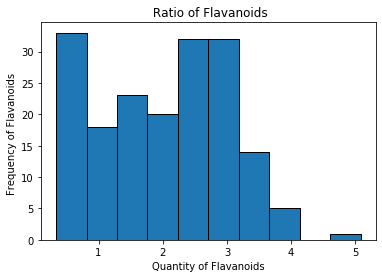

In [48]:
# For Flavanoids :-
plt.hist(df["Flavanoids"],edgecolor='k');
plt.title(" Ratio of Flavanoids")
plt.ylabel("Frequency of Flavanoids ")
plt.xlabel("Quantity of Flavanoids")

Text(0.5, 0, 'Quantity of Nonflavanoid_Phenols')

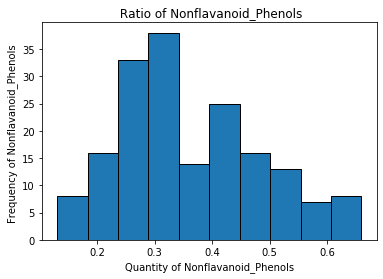

In [49]:
# For Nonflavanoid_Phenols :-
plt.hist(df["Nonflavanoid_Phenols"],edgecolor='k');
plt.title(" Ratio of Nonflavanoid_Phenols")
plt.ylabel("Frequency of Nonflavanoid_Phenols ")
plt.xlabel("Quantity of Nonflavanoid_Phenols")

Text(0.5, 0, 'Quantity of Proanthocyanins')

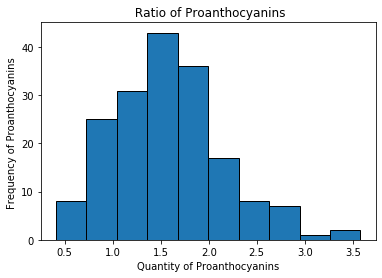

In [50]:
# For Proanthocyanins :-
plt.hist(df["Proanthocyanins"],edgecolor='k');
plt.title(" Ratio of Proanthocyanins")
plt.ylabel("Frequency of Proanthocyanins ")
plt.xlabel("Quantity of Proanthocyanins")

Text(0.5, 0, 'Quantity of Proanthocyanins')

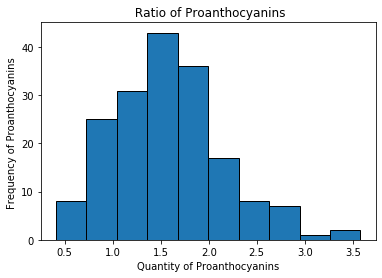

In [51]:
# For Proanthocyanins :-
plt.hist(df["Proanthocyanins"],edgecolor='k');
plt.title(" Ratio of Proanthocyanins")
plt.ylabel("Frequency of Proanthocyanins ")
plt.xlabel("Quantity of Proanthocyanins")

Text(0.5, 0, 'Quantity of Color_Intensity')

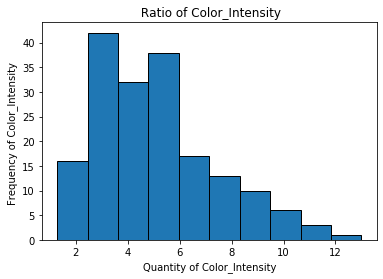

In [52]:
# For Color_Intensity :-
plt.hist(df["Color_Intensity"],edgecolor='k');
plt.title(" Ratio of Color_Intensity")
plt.ylabel("Frequency of Color_Intensity ")
plt.xlabel("Quantity of Color_Intensity")

Text(0.5, 0, 'Quantity of Hue')

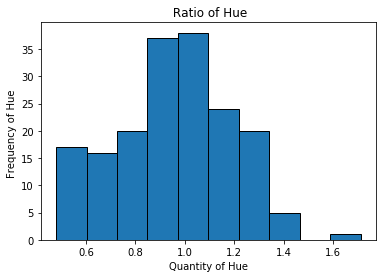

In [53]:
# For Hue :-
plt.hist(df["Hue"],edgecolor='k');
plt.title(" Ratio of Hue")
plt.ylabel("Frequency of Hue ")
plt.xlabel("Quantity of Hue")

Text(0.5, 0, 'Quantity of OD280')

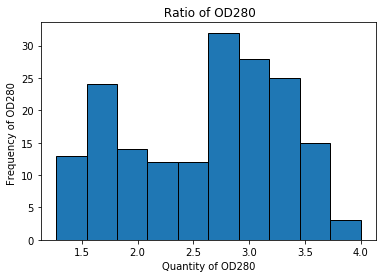

In [54]:
# For OD280:-
plt.hist(df["OD280"],edgecolor='k');
plt.title(" Ratio of OD280")
plt.ylabel("Frequency of OD280 ")
plt.xlabel("Quantity of OD280")

Text(0.5, 0, 'Quantity of Proline')

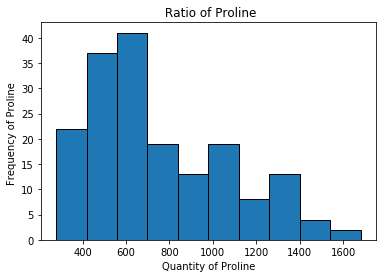

In [55]:
# For Proline:-
plt.hist(df["Proline"],edgecolor='k');
plt.title(" Ratio of Proline")
plt.ylabel("Frequency of Proline ")
plt.xlabel("Quantity of Proline")

In [56]:
# 12. Finding the relations between the variables.
correlation=df.corr()


In [57]:
# find  correlation with Customer_Segment
df.corr()["Customer_Segment"]

Alcohol                -0.328222
Malic_Acid              0.437776
Ash                    -0.049643
Ash_Alcanity            0.517859
Magnesium              -0.209179
Total_Phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid_Phenols    0.489109
Proanthocyanins        -0.499130
Color_Intensity         0.265668
Hue                    -0.617369
OD280                  -0.788230
Proline                -0.633717
Customer_Segment        1.000000
Name: Customer_Segment, dtype: float64

Heat Maps is a type of plot used to find the dependent variables. 
To find the relationship between the features ,can be done using heat maps.
The Customer_Segment feature depends mainly on Ash_Alcanity, Nonflavanoid_Phenols,Malic_Acid and Color_Intensity and Ash feature is very less correlated,so here Ash is removed.


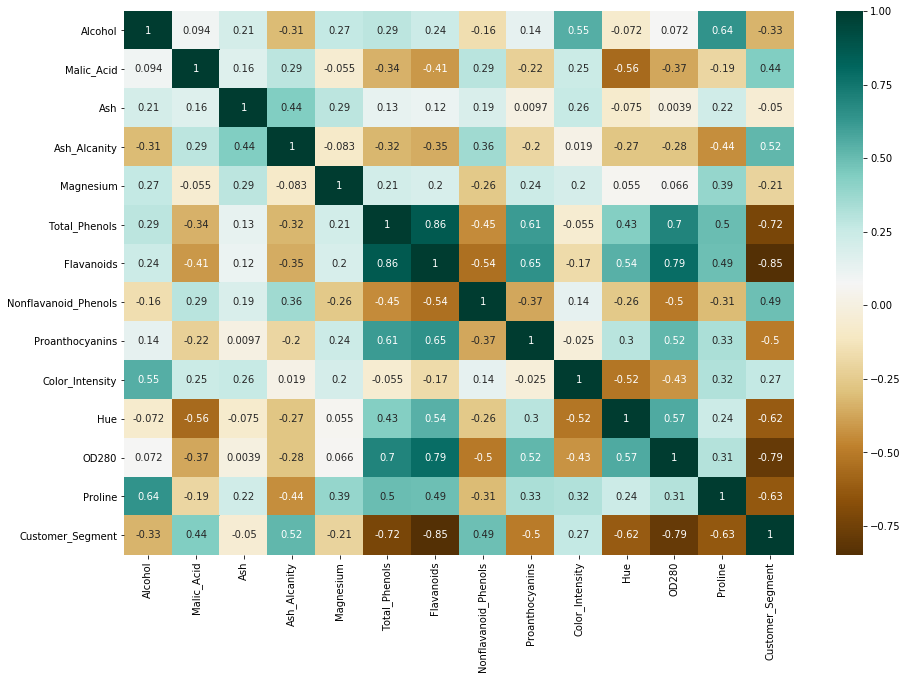

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,cmap="BrBG",annot=True)

Text(0.5, 0, 'Ash_Alcanity')

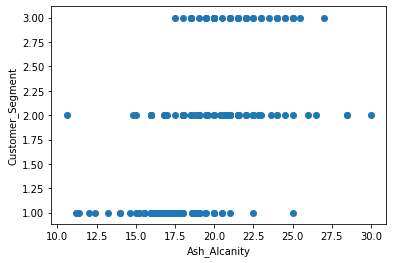

In [59]:
# Scatter Plot for Ash_Alcanity
plt.scatter(df["Ash_Alcanity"],df["Customer_Segment"])
plt.ylabel("Customer_Segment")
plt.xlabel("Ash_Alcanity")

Text(0.5, 0, 'Nonflavanoid_Phenols')

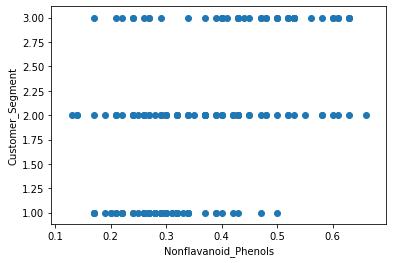

In [60]:
# Scatter Plot for  Nonflavanoid_Phenols
plt.scatter(df["Nonflavanoid_Phenols"],df["Customer_Segment"])
plt.ylabel("Customer_Segment")
plt.xlabel("Nonflavanoid_Phenols")

Text(0.5, 0, 'Malic_Acid')

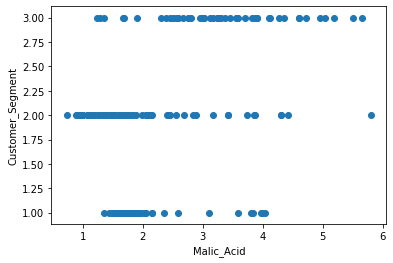

In [61]:
# Scatter Plot for Malic_Acid
plt.scatter(df["Malic_Acid"],df["Customer_Segment"])
plt.ylabel("Customer_Segment")
plt.xlabel("Malic_Acid")

Text(0.5, 0, 'Color_Intensity')

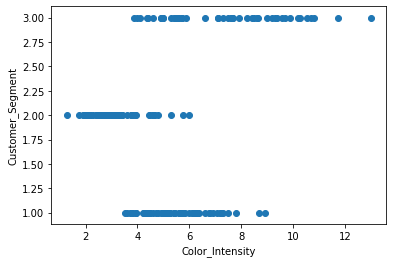

In [62]:
# Scatter Plot for Color_Intensity
plt.scatter(df["Color_Intensity"],df["Customer_Segment"])
plt.ylabel("Customer_Segment")
plt.xlabel("Color_Intensity")

Text(0.5, 0, 'Alcohol')

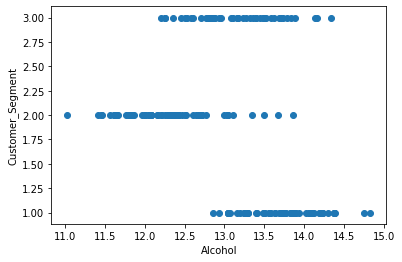

In [63]:
# Scatter Plot for Color_Intensity
plt.scatter(df["Alcohol"],df["Customer_Segment"])
plt.ylabel("Customer_Segment")
plt.xlabel("Alcohol")

Text(0.5, 0, 'Ash')

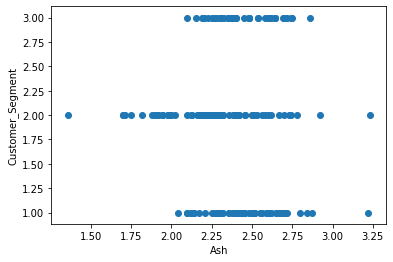

In [64]:
# Scatter Plot for Color_Intensity
plt.scatter(df["Ash"],df["Customer_Segment"])
plt.ylabel("Customer_Segment")
plt.xlabel("Ash")

# Using DT,RF,SVM,KNN,NB classifiers

In [65]:
# Without Considering Outliers

In [66]:
# X should in 2D matrix and y be 1D


In [67]:
#X=df.iloc[:,:13].values
X=df.drop(["Ash","Customer_Segment"],axis=1)
y=df.iloc[:,13].values
print(X.shape,y.shape)

(178, 12) (178,)


In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
# MinMax Scaling

mn=MinMaxScaler()
X_train=mn.fit_transform(X_train)
X_test=mn.transform(X_test)

In [71]:
# Instantiate the classifiers
names=["DT","RF","KNN","SVC","NB"]
classifiers=[DecisionTreeClassifier(),
             RandomForestClassifier(n_estimators=11),
             KNeighborsClassifier(n_neighbors=13),
             SVC(),
             GaussianNB()]

In [72]:
# Fitting Classification to the Training dataset
# tuple unpacking 
for name,clf in zip(names,classifiers):
    clf.fit(X_train,y_train)
    acc=clf.score(X_test,y_test)
    print("Classifier",name,"Accuracy:",acc)


Classifier DT Accuracy: 0.9259259259259259
Classifier RF Accuracy: 0.9814814814814815
Classifier KNN Accuracy: 0.9629629629629629
Classifier SVC Accuracy: 1.0
Classifier NB Accuracy: 0.9444444444444444


In [73]:
# Make prediction using the model
for name,clf in zip(names,classifiers):
    X_pred = [12.4,2.25,17.2,160,1.50,2.20,0.30,1.20,6.75,1.50,2.55,750]
    y_pred = clf.predict([X_pred])
    print("Prediction is: {}".format([y_pred]),"using ",name)

Prediction is: [array([1], dtype=int64)] using  DT
Prediction is: [array([1], dtype=int64)] using  RF
Prediction is: [array([1], dtype=int64)] using  KNN
Prediction is: [array([2], dtype=int64)] using  SVC
Prediction is: [array([1], dtype=int64)] using  NB


In [74]:
# Run model 5 times ,save accuracy in a variable for each classifier
# Print the average accuracy for each classifier

In [75]:
total_DT=[]
total_RF=[]
total_KNN=[]
total_SVC=[]
total_NB=[]

i=0
while i<5:
    print("---------------------------------------")
    print("Iteration:",i)
    for name,clf in zip(names,classifiers):
        clf.fit(X_train,y_train)
        acc=clf.score(X_test,y_test)
        print("Classifier",name,"Accuracy:",acc)
        
        if name=="DT":
            total_DT.append(acc)
         #   total_DT.append(total_DT)
        elif name=="RF":
            total_RF.append(acc)
          #  rf.append(total_RF)
        elif name=="KNN":
            total_KNN.append(acc)
         #   knn.append(total_KNN)
        elif name=="SVC":
            total_SVC.append(acc)
       #     svc.append(total_SVC)
        else:
            total_NB.append(acc)
        #    nb.append(total_NB)
    i=i+1
#print(total_DT,total_RF,total_KNN,total_SVC,total_NB)    

print("=======================================")   
print("Average of Each Classifier:- ")
print("---------------------------------------")
print("Decision Tree :",mean(total_DT))
print("Random Forest :",mean(total_RF))
print("K-Nearest Neighbor :",mean(total_KNN))
print("Support Vector Machine :",mean(total_SVC))
print("Naive Bayes :",mean(total_NB))

---------------------------------------
Iteration: 0
Classifier DT Accuracy: 0.9444444444444444
Classifier RF Accuracy: 0.9629629629629629
Classifier KNN Accuracy: 0.9629629629629629
Classifier SVC Accuracy: 1.0
Classifier NB Accuracy: 0.9444444444444444
---------------------------------------
Iteration: 1
Classifier DT Accuracy: 0.9444444444444444
Classifier RF Accuracy: 1.0
Classifier KNN Accuracy: 0.9629629629629629
Classifier SVC Accuracy: 1.0
Classifier NB Accuracy: 0.9444444444444444
---------------------------------------
Iteration: 2
Classifier DT Accuracy: 0.9629629629629629
Classifier RF Accuracy: 0.9444444444444444
Classifier KNN Accuracy: 0.9629629629629629
Classifier SVC Accuracy: 1.0
Classifier NB Accuracy: 0.9444444444444444
---------------------------------------
Iteration: 3
Classifier DT Accuracy: 0.9629629629629629
Classifier RF Accuracy: 0.9629629629629629
Classifier KNN Accuracy: 0.9629629629629629
Classifier SVC Accuracy: 1.0
Classifier NB Accuracy: 0.944444444444

# By masking outliers

In [76]:
X_m=mask.drop(["Ash","Customer_Segment"],axis=1) # Ash feature dropped 
y_m=mask.iloc[:,13].values
print(X_m.shape,y_m.shape)

(161, 12) (161,)


In [77]:
X_train_m,X_test_m,y_train_m,y_test_m = train_test_split(X_m,y_m,test_size = 0.3,random_state=0)

In [78]:
mn=MinMaxScaler()
X_train=mn.fit_transform(X_train)
X_test=mn.transform(X_test)

In [79]:
# Instantiate the classifiers
names_m=["DT","RF","KNN","SVC","NB"]
classifiers_m=[DecisionTreeClassifier(),
             RandomForestClassifier(n_estimators=11),
             KNeighborsClassifier(n_neighbors=13),
             SVC(),
             GaussianNB()]

In [80]:
# Fitting Classification to the Training dataset
# tuple unpacking 
for name_m,clf_m in zip(names_m,classifiers_m):
    clf.fit(X_train_m,y_train_m)
    acc_m=clf.score(X_test_m,y_test_m)
    print("Classifier",name_m,"Accuracy:",acc_m)


Classifier DT Accuracy: 0.9795918367346939
Classifier RF Accuracy: 0.9795918367346939
Classifier KNN Accuracy: 0.9795918367346939
Classifier SVC Accuracy: 0.9795918367346939
Classifier NB Accuracy: 0.9795918367346939


In [142]:
# Make prediction using the model
for name,clf in zip(names,classifiers):
    Xm_pred = [12.4,2.25,17.2,160,1.50,2.20,0.30,1.20,6.75,1.50,2.55,750]
    ym_pred = clf.predict([Xm_pred])
    print("Prediction is: {}".format([ym_pred]),"using ",name)

Prediction is: [array([1], dtype=int64)] using  DT
Prediction is: [array([1], dtype=int64)] using  RF
Prediction is: [array([1], dtype=int64)] using  KNN
Prediction is: [array([2], dtype=int64)] using  SVC
Prediction is: [array([1], dtype=int64)] using  NB


In [ ]:
plot_confusion_matrix(clf,X_test,y_test);

In [82]:
# Make prediction using the model
for name,clf in zip(names,classifiers):
    Xm_pred = [12.37,0.94,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
    ym_pred = clf.predict([Xm_pred])
    print("Prediction is: {}".format([ym_pred]),"using ",name)

Prediction is: [array([1], dtype=int64)] using  DT
Prediction is: [array([1], dtype=int64)] using  RF
Prediction is: [array([1], dtype=int64)] using  KNN
Prediction is: [array([2], dtype=int64)] using  SVC
Prediction is: [array([2], dtype=int64)] using  NB
